In [27]:
import numpy as np
from numpy import asarray
from PIL import Image, ImageDraw
from skimage.io import imread
import matplotlib.pyplot as plt
from math import *
import time

def Calculatemedian(list):
    a = len(list)
    if a % 2 == 0:
        b = list[len(list)/2]
        c = list[(len(list)/2)-1]
        d = (b + c) / 2
        return d

    if a % 2 > 0:
        return (list[len(list)//2])

def createFilter():
    array = [[1, 3, 1], [3, 5, 3], [1, 3, 1]]
    return array
def create_and_sort_V(image,medianFilter): 
    V = []
    for i in range(0, 3):
        for j in range(0, 3):
            counter = medianFilter[i][j]
            while(counter>0):
                V.append(image[i][j])
                counter=counter-1
    V.sort()
    #vector = V.astype(int)
    #print(vector)
    return V
def calculateMedianAndApply(image,vector):
    filter = createFilter()
    for i in range(0, image.shape[0]):
        for j in range(0, image.shape[1]):
            if(((i+3) < image.shape[0]) & ((j+3) < image.shape[1])):
                image3x3 = [[image[i-1,j-1],image[i,j-1],image[i+1,j-1]],
                            [image[i-1,j],image[i,j],image[i+1,j]] ,
                            [image[i-1,j+1],image[i,j+1],image[i+1,j+1]]]
                vector = create_and_sort_V(image3x3,filter)
                median = Calculatemedian(vector)
                image [i][j] = median
    return image
    

In [28]:
filter = createFilter()
print(filter)

[[1, 3, 1], [3, 5, 3], [1, 3, 1]]


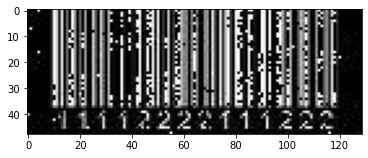

In [29]:
grey_scale_image = imread('D:/GUC/Semester 9/DMET 901 Computer Vision/Assignment 3/BarCode2.jpg', as_gray=True)*255
plt.imshow(grey_scale_image, cmap='gray')

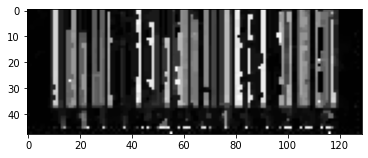

In [30]:
V = create_and_sort_V([[3,4,7],[2,5,8],[3,4,9]],filter)
imageOutput = calculateMedianAndApply(grey_scale_image,V)
plt.imshow(imageOutput, cmap='gray')